In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [2]:
(x_train,y_train) , (x_test,y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train[0].shape

(28, 28)

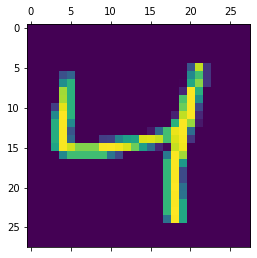

In [6]:
plt.matshow(x_train[2])

In [7]:
x_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

In [8]:
x_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  

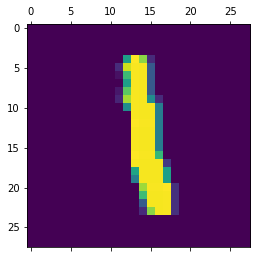

In [10]:
plt.matshow(x_train[6])

In [11]:
#normalize,pixel range 0-255 so divide by 255
x_train=x_train/255
x_test=x_test/255


In [12]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

**Flatten the** **data** -convert the 2d array representation of image to one dimension

In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
x_train_flatten=x_train.reshape(len(x_train), 28*28)
x_test_flatten=x_test.reshape(len(x_test),28*28)

In [15]:
x_train_flatten.shape

(60000, 784)

**BUILDING MODEL**

In [16]:
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


adam is an optimization algorithm which is faster than Stochastic Gradient Descent.sparse_categorical_crossentropy is a loss function similar to binary_crossentropy 

In [18]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4680 - accuracy: 0.8769
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3038 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2836 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2731 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2664 - accuracy: 0.9258


In [20]:
model.evaluate(x_test_flatten, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2707 - accuracy: 0.9220


[0.2706848978996277, 0.921999990940094]

In [25]:
y_predict=model.predict(x_test_flatten)
y_predict[2]

array([5.0926208e-04, 9.9566281e-01, 7.1764266e-01, 3.8276374e-01,
       3.3681840e-02, 1.2568310e-01, 1.8186367e-01, 1.4841330e-01,
       4.2031357e-01, 6.2181205e-02], dtype=float32)

np.argmax finds a maximum element from an array and returns the index of it

In [26]:
np.argmax(y_predict[2])

1

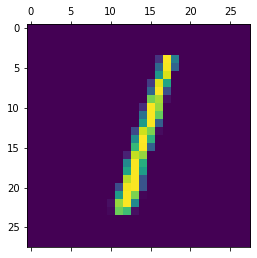

In [27]:
plt.matshow(x_test[2])

Building neural network model using hidden layer

In [29]:
model=keras.Sequential([
keras.layers.Flatten(input_shape=(28 ,28)),
keras.layers.Dense(100, activation='relu'),
keras.layers.Dense(10, activation='sigmoid')                        
])

In [30]:
model.compile(optimizer='adam' ,loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2692 - accuracy: 0.9235
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1190 - accuracy: 0.9649
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0825 - accuracy: 0.9757
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0624 - accuracy: 0.9817
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0503 - accuracy: 0.9848
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0409 - accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0318 - accuracy: 0.9902
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0280 - accuracy: 0.9908
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0220 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.019

In [33]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0798 - accuracy: 0.9765


[0.07982726395130157, 0.9764999747276306]